#**DATA WAREHOUSE AND DATA MINING**
CS 423: Data Warehousing and Data Mining (3+1): BESE-10/BSCS-9 Fall 2022
##Semester Project
##Group Members
*   Muhammad Hamza Imran 
*   Muhammad Muzammil Malik
*   Hamza Mustaque
*   Adeel Ahmed
---

#ENVIRONMENT SETUP

##Imports

In [ ]:
import numpy as np 
import pandas as pd

##Connecting Google Drive

In [ ]:
# Connectiong Google Drive to access dataset 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading Dataset 

In [ ]:
properties_fe = pd.read_csv("/content/drive/MyDrive/DWDM/Dataset.csv")
properties_fe.head(10)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN
5,785289,3102,https://www.zameen.com/Property/gulberg_paf_fa...,House,52000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,5,06-02-2019,2019,6,2,MATZ Services,Group Captain (R) Tajammul Baig
6,891543,4031,https://www.zameen.com/Property/military_accou...,House,16500000,High,Military Accounts Housing Society,Lahore,Punjab,"Military Accounts Housing Society, Lahore, Punjab",...,8.0,2178.01,For Sale,6,07-03-2019,2019,7,3,NaN,NaN
7,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,32500000,High,EME Society,Lahore,Punjab,"EME Society, Lahore, Punjab",...,20.0,5445.02,For Sale,5,07-03-2019,2019,7,3,Sukhera Estate & Builders,Ahmed Sheraz Sukhera
8,983066,3745,https://www.zameen.com/Property/eme_society_em...,House,31500000,High,EME Society,Lahore,Punjab,"EME Society, Lahore, Punjab",...,20.0,5445.02,For Sale,6,07-03-2019,2019,7,3,Sukhera Estate & Builders,Ahmed Sheraz Sukhera
9,983075,3931,https://www.zameen.com/Property/izmir_town_izm...,House,40000000,Very High,Izmir Town,Lahore,Punjab,"Izmir Town, Lahore, Punjab",...,32.0,8712.03,For Sale,6,07-03-2019,2019,7,3,Sukhera Estate & Builders,Ahmed Sheraz Sukhera


#DATA PRE EXPLORATION



##Cities available in dataset

In [ ]:
print(properties_fe["city"].unique())
properties_fe.shape

['Lahore' 'Karachi' 'Islamabad' 'Faisalabad' 'Rawalpindi']


(191393, 24)

##Selecting 1 City

In [ ]:
df = properties_fe[properties_fe["city"] == "Lahore"]
df.head()
df.shape

(58736, 24)

#DATA REFINING:
There are many columns in the data set. Except for the useful columns removing all the remaing columns from the dataset.

##Droping extra columns

In [ ]:
col_names = ["location_id","page_url","province_name","locality","area_marla","year","month","day","agency","agent","latitude","longitude","property_id","property_type","price_bin","purpose","date_added","city","area"]
df = df.drop(col_names, axis=1)
df = df.reset_index()
df = df.drop("index",axis=1)
df.head()

,price,location,baths,area_sqft,bedrooms
0,220000000,Model Town,0,32670.12,0
1,40000000,Multan Road,5,5445.02,5
2,9500000,Eden,0,2450.26,3
3,125000000,Gulberg,7,5445.02,8
4,21000000,Allama Iqbal Town,5,2994.76,6


##Droping Null Columns

In [ ]:
df.isna().sum()

price        0
location     0
baths        0
area_sqft    0
bedrooms     0
dtype: int64

In [ ]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

df.shape

(58736, 5)

In [ ]:
df['bedrooms'].unique()

array([ 0,  5,  3,  8,  6,  4,  2,  7,  1, 10, 11,  9, 14, 12, 13, 18, 15,
       16, 25, 20])

# DATA CLEANING

##Exploring Odd Data

As You can see in the above cell that there are some properties which have bedrooms even greater than 10...This could be possible that some of them could be typo error while others can be having other errors in them as well like very less baths or no baths...Lets inspect the properties that are having bedrooms more than 13

###More than 13 bedrooms

In [ ]:
df[df['bedrooms']>13]

,price,location,baths,area_sqft,bedrooms
1099,100000000,Garden Town,0,10890.04,14
19710,650000000,Gulberg,0,25047.09,18
21817,175000000,Shah Jamal,0,26136.10,15
28454,350000000,Gulberg,0,17424.06,16
38558,175000000,Shah Jamal,0,26136.10,15
39985,960000000,Gulberg,0,43560.16,25
51998,960000000,Gulberg,0,43560.16,25
53342,1000000,Gulberg,0,21780.08,20
57580,300000,Habibullah Road,0,8712.03,20


Notice how some of them are having no baths and some are having very less number of baths as compared to their bedrooms...

###Zero bath

In [ ]:
df['baths'].unique()

array([ 0,  5,  7,  6,  4,  3,  2,  8,  1, 10,  9, 11, 12, 15])

Also notice in the above cell that some properties are having upto 12 baths as well, this could be a typo error as well

##Data Droping

###No Bath but Bedroom > 3

In [ ]:
df = df.drop(df[(df['baths']==0) & (df['bedrooms'] > 3)].index)
df

,price,location,baths,area_sqft,bedrooms
0,220000000,Model Town,0,32670.12,0
1,40000000,Multan Road,5,5445.02,5
2,9500000,Eden,0,2450.26,3
3,125000000,Gulberg,7,5445.02,8
4,21000000,Allama Iqbal Town,5,2994.76,6
...,...,...,...,...,...
58730,32000,Allama Iqbal Town,0,2722.51,2
58732,185000,DHA Defence,6,5445.02,5
58733,150000,DHA Defence,5,2722.51,4
58734,70000,DHA Defence,3,5445.02,3


In the above cell we are dropping those indexes that are having no baths and having bedrooms greater than 3 cause they can probably be a typo error.

###No Bath or No Bedroom

In [ ]:
df.drop(df[(df['bedrooms']==0) | (df['baths']==0)].index, inplace=True)

We are also dropping those properties that are either having no bedrooms or no baths in the above cell...

###Bath More than Bedroom

In [ ]:
df[df["baths"] > df["bedrooms"]].head(25)

,price,location,baths,area_sqft,bedrooms
5,52000000,Gulberg,6,5445.02,5
6,16500000,Military Accounts Housing Society,7,2178.01,6
11,87500000,Upper Mall,5,6534.02,4
17,50000000,Agrics Town,7,4900.52,6
19,27500000,Askari,5,3267.01,4
21,50000000,Upper Mall,6,5445.02,5
22,45000000,Askari,6,5445.02,5
24,21200000,Askari,4,2722.51,3
25,23000000,Askari,5,2722.51,4
26,21500000,Askari,5,2722.51,4


There are some homes that are having more number of baths as compared to its bedrooms which is quite uncommon...

## OUTLIERS DETECTION AND REMOVALS:

###Adding per square foot column

In [ ]:
df['price_per_sqft'] = df['price'] / df['area_sqft']
df.head()

,price,location,baths,area_sqft,bedrooms,price_per_sqft
1,40000000,Multan Road,5,5445.02,5,7346.162181
3,125000000,Gulberg,7,5445.02,8,22956.756816
4,21000000,Allama Iqbal Town,5,2994.76,6,7012.248060
5,52000000,Gulberg,6,5445.02,5,9550.010836
6,16500000,Military Accounts Housing Society,7,2178.01,6,7575.722793


We have add a column of price_per_sqft for our feature engineering so that we can remove the outliers from our data....

###Locations in Lahore

In [ ]:
len(df['location'].unique())

618

###Locations and no. of houses there

In [ ]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(40)

location
DHA Defence                             10188
Bahria Town                              5846
Johar Town                               2503
Askari                                   1523
Wapda Town                               1176
Allama Iqbal Town                        1052
State Life Housing Society               1031
Gulberg                                  1012
Model Town                                776
Cantt                                     764
Al Rehman Garden                          707
Paragon City                              579
Bahria Orchard                            565
Pak Arab Housing Society                  534
Sabzazar Scheme                           484
Eden                                      460
Valencia Housing Society                  451
DHA 11 Rahbar                             439
Lalazaar Garden                           390
Lake City                                 376
Samanabad                                 369
Gulshan-e-Ravi           

###Locations with less than 10 houses

In [ ]:
len(location_stats[location_stats <= 10])

365

Here we have 365 locations that are having properties less than 10 so we can categorize them as others which will help us in dimensionality reduction in our machine learning model.

In [ ]:
locations_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x:'others' if x in locations_less_than_10 else x)

In [ ]:
df['location'].nunique()

254

Firstly there were 199 unique locations and now we are having only 56 unique locations after dimensionality reduction
Now we have only 254 locations with less the 10 properties. Before the number was 365.

###Area Sq. Feet

In [ ]:
df[df['area_sqft'] / df['bedrooms'] < 300]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
23,3200000,Chungi Amar Sadhu,2,816.75,3,3917.967554
35,5500000,others,3,680.63,3,8080.748718
71,6000000,Allama Iqbal Town,2,544.50,3,11019.283747
72,5500000,Allama Iqbal Town,2,544.50,3,10101.010101
119,4500000,Al Faisal Town,3,544.50,3,8264.462810
...,...,...,...,...,...,...
58453,3300000,Mughalpura,2,272.25,2,12121.212121
58496,25000,DHA Defence,1,272.25,1,91.827365
58503,22000,DHA Defence,1,299.48,1,73.460665
58519,8500,Gulberg,1,299.48,1,28.382530


In the above cell we assume that on  minimum a bedroom must be more than 300 sq.ft so those that were not following that rule in our data we will be removing them as they will be considered as outliers...

In [ ]:
df.drop(df[df['area_sqft'] / df['bedrooms'] < 300].index, inplace = True)

###Data Understanding

In [ ]:
df['price_per_sqft'].describe()

count     41638.000000
mean       5979.539002
std        4391.015870
min           0.000735
25%          76.522570
50%        6887.027045
75%        8723.567590
max      106519.742883
Name: price_per_sqft, dtype: float64

Notice how much it is having standard deviation we will reduce it...

###Reducing Standard Deviation

In [ ]:
# removing price_per_sqft outliers 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-std)) & (subdf['price_per_sqft'] <= (m+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [ ]:
df = remove_pps_outliers(df)
df.shape

(27770, 6)

###Data Visualization

In [ ]:
def plot_scatter_chart(df, location):
    bedroom_2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bedroom_3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

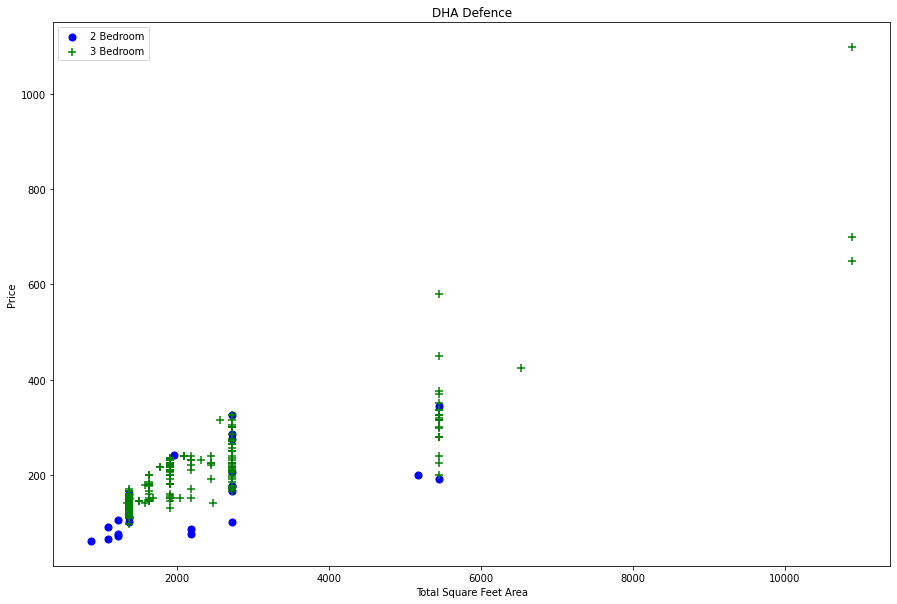

In [ ]:
plot_scatter_chart(df, "DHA Defence")

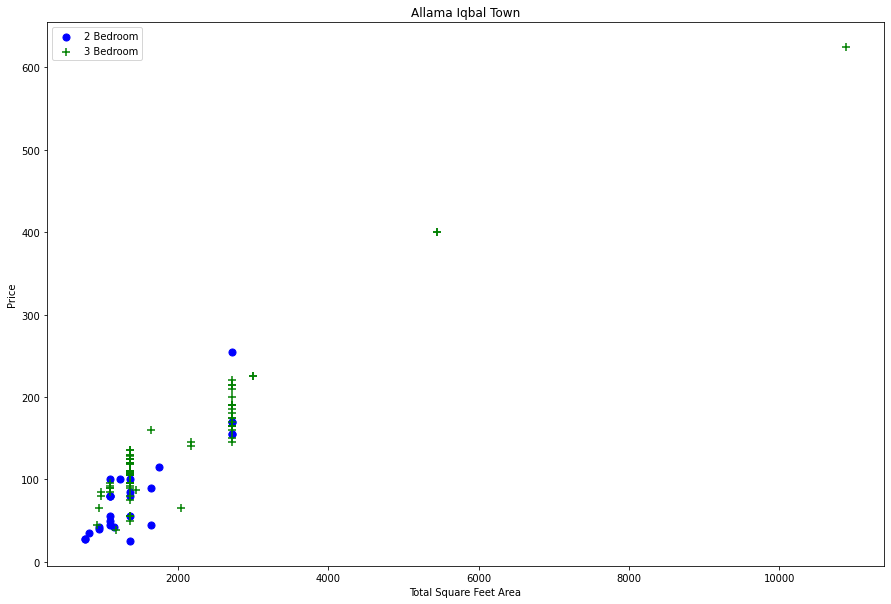

In [ ]:
plot_scatter_chart(df, "Allama Iqbal Town")

Notice in the above graph that there are some properties having 3 bedrooms still in less price than 2 bedrooms properties in a specfied location. Now they can also be considered as outliers and we should also remove them so that they cannot affect our model performance

###Removing Outliers

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            bhk_stats[bedroom] = {
                'mean' : np.mean(bedroom_df["price_per_sqft"]),
                'std' : np.std(bedroom_df["price_per_sqft"]),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            stats = bhk_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index") 

In [ ]:
df = remove_bhk_outliers(df)
df.shape

(17633, 6)

###Sorting locations

In [ ]:
df.groupby('location')['location'].agg('count').sort_values(ascending=False).head(40)

location
Bahria Town                          2843
DHA Defence                          2384
Askari                                699
Johar Town                            621
Bahria Orchard                        480
others                                435
State Life Housing Society            430
Paragon City                          406
Allama Iqbal Town                     360
Gulberg                               344
DHA 11 Rahbar                         330
Model Town                            311
Park View Villas                      311
Wapda Town                            295
Cantt                                 286
Al Rehman Garden                      259
Eden                                  239
Military Accounts Housing Society     227
Pak Arab Housing Society              218
Lake City                             185
Valencia Housing Society              176
Khayaban-e-Amin                       171
EME Society                           144
Lahore Medical Housing So

###New Visualizations

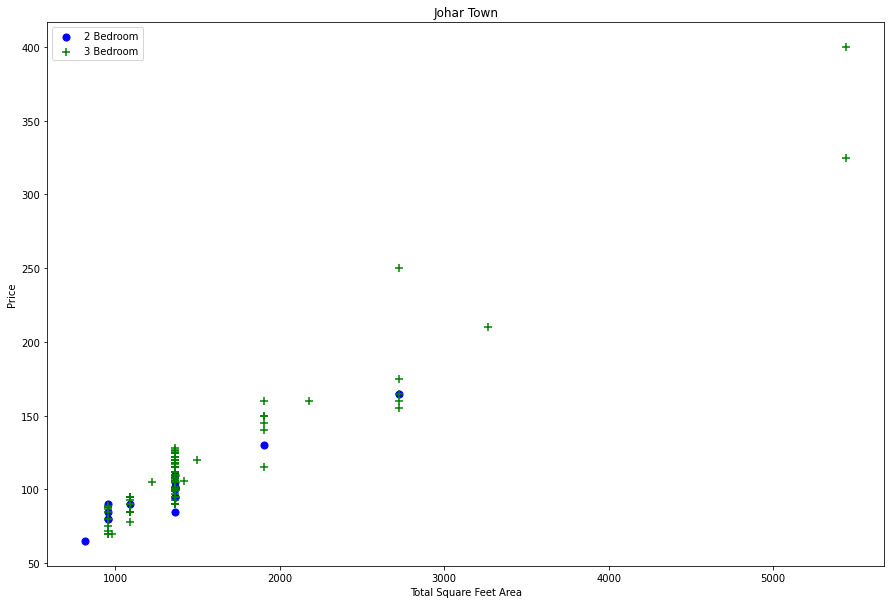

In [ ]:
plot_scatter_chart(df,"Johar Town")

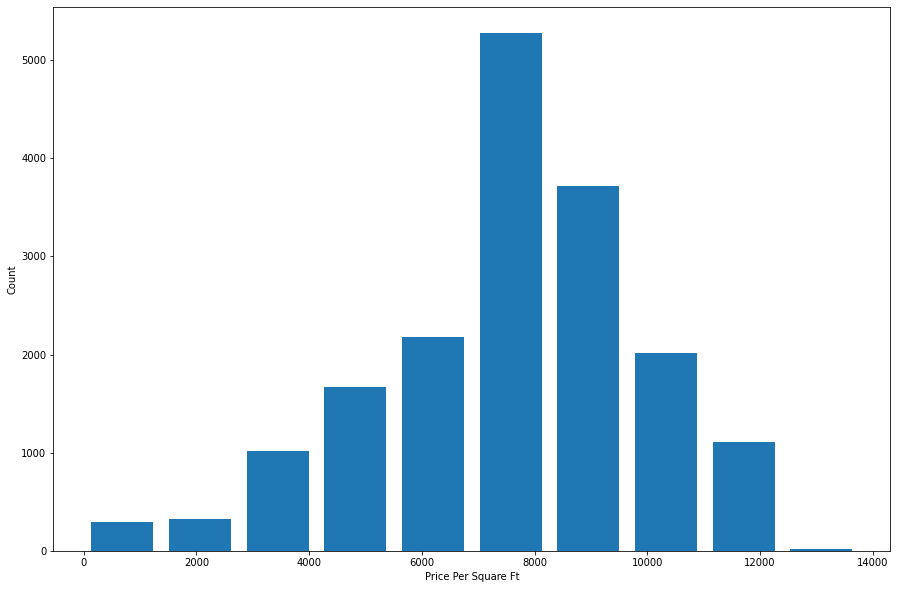

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

Then we plot the graph and 8000 price per square ft is the most common price 

###Bath greater than 2+ Bedrooms

In [ ]:
df[df['baths'] > df['bedrooms']]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
1,19000000,AWT Army Welfare Trust,4,5445.02,3,3489.427036
3,21000000,AWT Army Welfare Trust,6,5445.02,5,3856.735145
6,5800000,AWT Army Welfare Trust,3,2722.51,2,2130.387033
8,9000000,AWT Army Welfare Trust,3,2722.51,2,3305.772982
14,2800000,Aashiana Road,2,544.50,1,5142.332415
...,...,...,...,...,...,...
27756,20000000,others,7,2722.51,5,7346.162181
27761,18500000,others,5,2722.51,4,6795.200018
27762,15000000,others,4,1905.76,3,7870.875661
27763,40000000,others,6,5445.02,5,7346.162181


In [ ]:
df[df['baths'] > (df['bedrooms'] + 2)]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
598,40000,Al-Kabir Town,8,43560.16,5,0.918270
1972,14000000,Askari,7,2722.51,3,5142.313527
3009,11800000,Bahria Town,6,1361.25,3,8668.503214
3323,11200000,Bahria Town,6,1361.25,3,8227.731864
3381,50000000,Bahria Town,9,5445.02,5,9182.702727
...,...,...,...,...,...,...
26217,65000000,Valencia Housing Society,8,10890.04,5,5968.756772
26250,75000000,Valencia Housing Society,10,10890.04,7,6887.027045
27165,19500000,others,5,2722.51,2,7162.508127
27421,17500000,others,8,2722.51,5,6427.891909


In [ ]:
df = df.drop(df[df['baths'] > (df['bedrooms'] + 2)].index)
df.shape

(17543, 6)

In [ ]:
df1 = df.drop("price_per_sqft", axis=1)

As we add the column price_per_sqft for our dimensionality reduction we will now remove this column as this is not a feature for predicting property pricing...

#DATA PRE-PROCESSING
Here the Data is in Numeric form or in the true false form but we need data in binary form for modeling.So we created dummies with all the locations zero. If some house belongs to some location then its value will be 1 and all the values will be zero.

##Dummy Data of Locations

In [ ]:
dummies = pd.get_dummies(df1['location'])
dummies.head(3)

,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Aitchison Society,Al Faisal Town,Al Hafeez Gardens,Al Hamad Colony,Al Jalil Garden,...,Wahdat Road,Walled City,Walton Road,Wapda Town,Wassanpura,West Wood Housing Society,Zaheer Villas,Zaitoon - New Lahore City,Zaman Colony,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


First we make dummies of our locations

##Filling Data in Dummies

In [ ]:
df1 = pd.concat([df1, dummies.drop('others', axis=1)], axis="columns")
df1 = df1.drop("location", axis=1)
df1.head()
df1.shape

(17543, 255)

Then we concat them with our data...

#BUILDING MODEL

##Attributes

In [ ]:
X = df1.drop('price', axis=1) # Features
X.head()

,baths,area_sqft,bedrooms,AWT Army Welfare Trust,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Aitchison Society,Al Faisal Town,...,Wahdat Colony,Wahdat Road,Walled City,Walton Road,Wapda Town,Wassanpura,West Wood Housing Society,Zaheer Villas,Zaitoon - New Lahore City,Zaman Colony
0,4,2722.51,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5445.02,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1361.25,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,5445.02,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2722.51,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.to_csv('./X.csv', sep = ',', index = False)

In [ ]:
X.columns

Index(['baths', 'area_sqft', 'bedrooms', 'AWT Army Welfare Trust',
       'Aashiana Road', 'Abdalians Cooperative Housing Society',
       'Airline Housing Society', 'Airport Road', 'Aitchison Society',
       'Al Faisal Town',
       ...
       'Wahdat Colony', 'Wahdat Road', 'Walled City', 'Walton Road',
       'Wapda Town', 'Wassanpura', 'West Wood Housing Society',
       'Zaheer Villas', 'Zaitoon - New Lahore City', 'Zaman Colony'],
      dtype='object', length=254)

##Outcome

In [ ]:
y = df1['price'] # Predictor or predicted_variable
y.head()

0    11000000
1    19000000
2     5000000
3    21000000
4     5600000
Name: price, dtype: int64

As the price of property is continuous so we will be using regression models 

##Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split # for dividing data into training and test sets
from sklearn.linear_model import LinearRegression # for predicting price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6935115506439525

Note that our linear regression model performs with 69% accuracy which is quite good...

##Improving Accuracy

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=46)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.69351155, 0.68687481, 0.72271741, 0.44230526, 0.54384357])

Then use shuffle split for our cross validation and it gives the maximum accuracy of 72%...

##All Possible Models

In [ ]:
# importing other regression models to find the best performing model using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

##Finding Best Suitable Model

In [ ]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params': {'normalize':[True,False]}
    
        },'decision_tree_regressor':{
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse','friedman_mse'], 'splitter':['best','random']}
        },'lasso': {
            'model':Lasso(),
            'params': {'alpha':[1,2], 'selection':['random','cyclic']}
        }
    }
    
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False, n_jobs=-1, cv=cv)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_ ,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [ ]:
find_best_model_using_gridsearchcv(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.545587,{'normalize': False}
1,decision_tree_regressor,0.853962,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.545589,"{'alpha': 2, 'selection': 'random'}"


As decision_tree_regressor performs the best with 86% accuracy we will be using its best params and bulding our model...

##Decision Tress Regression

In [ ]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=0)
dtr.fit(X, y)

DecisionTreeRegressor(criterion='friedman_mse', random_state=0,
                      splitter='random')

##Saving Model

In [ ]:
import pickle

In [ ]:
pickle.dump(dtr, open('/content/model_saved.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('/content/model_saved.pkl', 'rb'))

In [ ]:
# loaded_model.predict()

In [ ]:
X.columns

Index(['baths', 'area_sqft', 'bedrooms', 'AWT Army Welfare Trust',
       'Aashiana Road', 'Abdalians Cooperative Housing Society',
       'Airline Housing Society', 'Airport Road', 'Aitchison Society',
       'Al Faisal Town',
       ...
       'Wahdat Colony', 'Wahdat Road', 'Walled City', 'Walton Road',
       'Wapda Town', 'Wassanpura', 'West Wood Housing Society',
       'Zaheer Villas', 'Zaitoon - New Lahore City', 'Zaman Colony'],
      dtype='object', length=254)

#TESTING 

##Function for testing model

In [ ]:
def predict_price(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = sqft
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    print(x[3])
    return loaded_model.predict([x])[0] / 100000

##Calling Function

In [ ]:
print(str(int(predict_price('Paragon City', 1800, 4, 3))) + " Lakhs")

0.0
140 Lakhs


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(str(int(predict_price('Gulberg', 1080, 3, 2))) + " Lakhs")

0.0
60 Lakhs


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(str(int(predict_price('AWT Army Welfare Trust', 1080, 3, 2))) + " Lakhs")

1.0
89 Lakhs


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


#Webpage

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask
from pyngrok import ngrok

In [ ]:
port_no = 5000

In [ ]:
from  flask import render_template
import requests

In [ ]:
app = Flask(__name__)
ngrok.set_auth_token("2JjCRWzlNFIiPK0XXTaUra25guX_82stzgNzSxXeTwB8AWfEe")
public_url =  ngrok.connect(port_no).public_url

@app.route("/", methods =["GET", "POST"])
def home():
    return f"""
    <html>
    <head>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" integrity="sha384-rbsA2VBKQhggwzxH7pPCaAqO46MgnOM80zW1RWuH61DGLwZJEdK2Kadq2F9CUG65" crossorigin="anonymous">
    </head>
    <body>


<div class='container'>
<div class='row'>
<form class='form-group'>
<div style='height:100px;'></div>
  
  <div class='font-weight-bold'>
  
<h2>Real Estate Price Prediction</h2>
</div>

  <div class='col-6'>
  <label class='font-weight-bold' for='location'>Enter Location:</label><br>
  <input type="text" id="location" name='location' class='form-control' value=''><br>
  </div>
    <div class='col-6'>
  <label class='font-weight-bold' for='sqft'>Square Feet:</label><br>
  <input type='text' id='sqft' name='sqft'  class='form-control' value=''><br><br>
  </div>
  <div class='col-6'>
  <label class='font-weight-bold' for='bedrooms'>Bedroom:</label><br>
  <input type='text' id='bedrooms' name='bedrooms'  class='form-control' value=''><br><br>
  </div>
  <div class='col-6'>
  <label class='font-weight-bold' for='baths'>No. of bath:</label><br>
  <input type='text' id='baths' name='baths'  class='form-control' value=''><br><br>
  </div>
  <input class='btn btn-primary' type='submit' value='Predict Price'>
</form> 
</div>
</div>
</body>
</html>

    """

app.run(port=port_no)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
